In [2]:
rcg = Table.read('rc_gais_gaiadr2_apogee_dust_7-29.txt', format='ascii')
rcp = Table.read('rc_plane_gaiadr2_apogee_7-28.txt', format='ascii')  

lg = Table.read('gais_gaia_lamost_huang20.txt', format='ascii')   
lp = Table.read('rc_plane_gaiadr2_lamost_08-28-20.txt', format='ascii') 

In [3]:
print('N GAIS APOGEE = '+str(len(rcg)))
print('N UVGAPS APOGEE = '+str(len(rcp)))
print('N GAIS LAMOST = '+str(len(lg)))
print('N UVGAPS LAMOST = '+str(len(lp)))

N GAIS APOGEE = 16217
N UVGAPS APOGEE = 413
N GAIS LAMOST = 33698
N UVGAPS LAMOST = 973


# For CMD, load full match tables for APOGEE

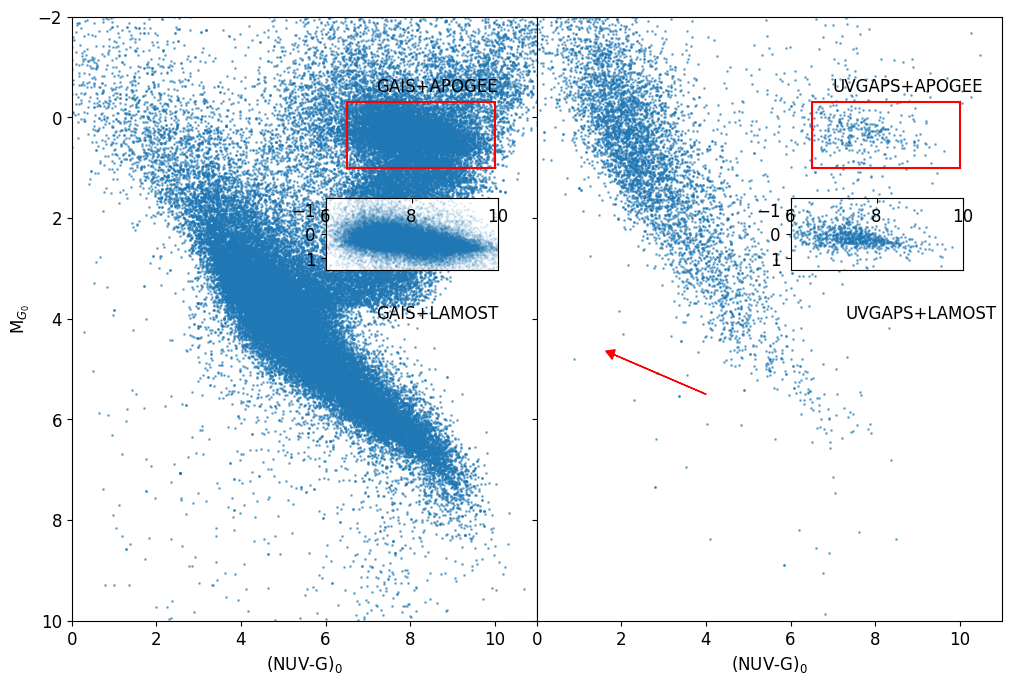

In [4]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
matplotlib.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

ga = Table.read('gais_gaiadr2_apogee_ebvsfd_7-20.txt', format='ascii')
pa = Table.read('plane_gaia_apo13_match_07_03_19.txt', format='ascii')

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True)

fig.subplots_adjust(wspace=0)

ax1.scatter((ga['mag_nuv']-ga['ebvsfd']*7.24)-(ga['phot_g_mean_mag']-ga['ebvsfd']*2.85), (ga['phot_g_mean_mag']-ga['ebvsfd']*2.85)-ga['distmod'], s=1, alpha=0.5)

ax2.scatter((pa['nuv']-pa['ebv']*7.24)-(pa['phot_g_mean_mag']-pa['ebv']*2.85), (pa['phot_g_mean_mag']-pa['ebv']*2.85)-pa['distmod'], s=1, alpha=0.5)
ax1.set_ylim(10, -2)
ax1.set_xlim(0, 11)
plt.ion()
ax1.set_xlabel('(NUV-G)$_0$')
ax2.set_xlabel('(NUV-G)$_0$')
ax1.set_ylabel('M$_{G_0}$')
ax1.annotate('GAIS+APOGEE', xy=(7.2, -0.5))
ax2.annotate('UVGAPS+APOGEE', xy=(7, -0.5))
ax1.plot((6.5, 10), (-0.3,-0.3), color='red')
ax1.plot((6.5, 10), (1,1), color='red')
ax1.plot((10, 10), (-0.3, 1), color='red')
ax1.plot((6.5, 6.5), (-0.3, 1), color='red')
ax2.plot((6.5, 10), (-0.3,-0.3), color='red')
ax2.plot((6.5, 10), (1,1), color='red')
ax2.plot((10, 10), (-0.3, 1), color='red')
ax2.plot((6.5, 6.5), (-0.3, 1), color='red')



axin1 = inset_axes(ax1, width="100%", height="100%",
                   bbox_to_anchor=(6/11., 7/10., 0.37, -.12),
                   bbox_transform=ax1.transAxes, loc=2, borderpad=0)
axin1.set_xlim(6, 10)
axin1.set_ylim(1.5, -1.5)

axin1.scatter((lg['mag_nuv']-lg['ebv']*7.24)-(lg['phot_g_mean_mag']-lg['ebv']*2.85), lg['phot_g_mean_mag']-lg['ebv']*2.85-lg['distmod'], s=1, alpha=0.1)

ax1.annotate('GAIS+LAMOST', xy=(7.2, 4))
axin1.invert_yaxis()
axin1.xaxis.set_label_position('bottom') 
axin1.xaxis.set_ticks_position('bottom') # the rest is the same


axin2 = inset_axes(ax2, width="100%", height="100%",
                   bbox_to_anchor=(6/11., 7/10., 0.37, -.12),
                   bbox_transform=ax2.transAxes, loc=2, borderpad=0)
axin2.set_xlim(6, 10)
axin2.set_ylim(1.5, -1.5)
axin2.scatter((lp['nuv']-lp['ebv3d']*7.24)-(lp['phot_g_mean_mag']-lp['ebv3d']*2.85), lp['phot_g_mean_mag']-lp['ebv3d']*2.85-lp['distmod'], s=1, alpha=0.5)
ax2.annotate('UVGAPS+LAMOST', xy=(7.3, 4))
axin2.invert_yaxis()
ax2.arrow(4, 5.5, (2.972-0.789)*-1, -0.789, head_length=0.2, head_width=0.2, color='red')

plt.show()



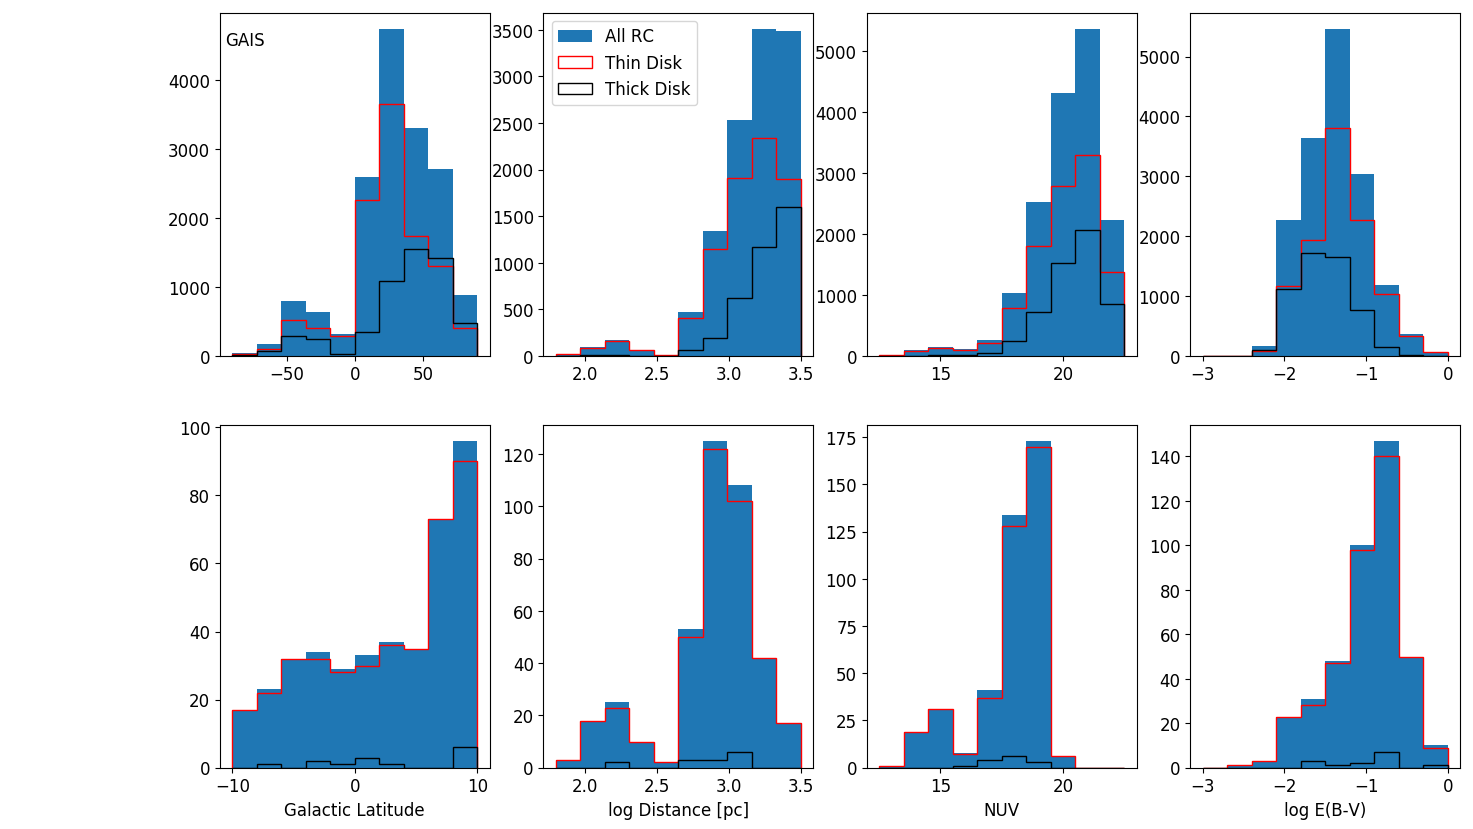

In [5]:
x1, y1 = 0.02, 0.065
x2, y2 = -0.86, 0.23
m = (y2 - y1) / (x2 - x1)
b = y1 - m*x1

thickp,= np.where((rcp['alphafe'] > 0.08) & (rcp['alphafe'] > (m*rcp['FE_H'] + b)))
thinp,= np.where((rcp['alphafe'] < 0.08) | (rcp['alphafe'] < (m*rcp['FE_H'] + b)))
thickg,= np.where((rcg['alphafe'] > 0.08) & (rcg['alphafe'] > (m*rcg['FE_H'] + b)))
thing,= np.where((rcg['alphafe'] < 0.08) | (rcg['alphafe'] < (m*rcg['FE_H'] + b)))
thinp = rcp[thinp]
thickp = rcp[thickp]
thing = rcg[thing]
thickg = rcg[thickg]

matplotlib.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['figure.dpi'] = 100


fig, axes = plt.subplots(2, 4)
axes[0, 0].hist(rcg['glat'], range=[-90,90])
axes[0, 0].hist(thing['glat'], range=[-90,90], histtype='step',color='red', fill=False, stacked=True)
axes[0, 0].hist(thickg['glat'], range=[-90,90], histtype='step', color='black', fill=False, stacked=True)
axes[1, 0].hist(rcp['gb'], range=[-10,10])
axes[1, 0].hist(thinp['gb'], range=[-10,10], histtype='step',color='red', fill=False, stacked=True)
axes[1, 0].hist(thickp['gb'], range=[-10,10], histtype='step', color='black', fill=False, stacked=True)
axes[0, 1].hist(np.log10(rcg['dist']), range=[1.8,3.5], label='All RC')
axes[0, 1].hist(np.log10(thing['dist']), range=[1.8,3.5], histtype='step', color='red', stacked=True, fill=False, label='Thin Disk')
axes[0, 1].hist(np.log10(thickg['dist']), range=[1.8,3.5], histtype='step', color='black', stacked=True, fill=False, label='Thick Disk')

axes[1, 1].hist(np.log10(rcp['dist']), range=[1.8,3.5])
axes[1, 1].hist(np.log10(thinp['dist']), range=[1.8,3.5], histtype='step', color='red', stacked=True, fill=False, label='Thin disk')
axes[1, 1].hist(np.log10(thickp['dist']), range=[1.8,3.5], histtype='step', color='black', stacked=True, fill=False, label='Thick disk')
axes[0, 2].hist(rcg['mag_nuv'], range=[12.5, 22.5])
axes[0, 2].hist(thing['mag_nuv'],range=[12.5, 22.5], histtype='step', color='red', stacked=True, fill=False)
axes[0, 2].hist(thickg['mag_nuv'],range=[12.5, 22.5], histtype='step', color='black', stacked=True, fill=False)

axes[1, 2].hist(rcp['nuv'], range=[12.5, 22.5])
axes[1, 2].hist(thinp['nuv'],range=[12.5, 22.5], histtype='step', color='red', stacked=True, fill=False)
axes[1, 2].hist(thickp['nuv'],range=[12.5, 22.5], histtype='step', color='black', stacked=True, fill=False)
axes[0, 3].hist(np.log10(rcg['ebvsfd']), range=[-3,0])
axes[0, 3].hist(np.log10(thing['ebvsfd']), range=[-3,0], histtype='step', color='red', stacked=True, fill=False)
axes[0, 3].hist(np.log10(thickg['ebvsfd']), range=[-3,0], histtype='step', color='black', stacked=True, fill=False)

axes[1, 3].hist(np.log10(rcp['ebv']), range=[-3,0])
axes[1, 3].hist(np.log10(thinp['ebv']), range=[-3,0], histtype='step', color='red', stacked=True, fill=False)
axes[1, 3].hist(np.log10(thickp['ebv']), range=[-3,0], histtype='step', color='black', stacked=True, fill=False)
axes[1, 0].set_xlabel('Galactic Latitude')
axes[1, 1].set_xlabel('log Distance [pc]')
axes[1, 2].set_xlabel('NUV')
axes[1, 3].set_xlabel('log E(B-V)')
axes[0, 1].legend()
axes[0, 0].annotate('GAIS', xy=(-95, 4500))
axes[1, 0].annotate('UVGAPS', xy=(-10, 140))
#fig.subplots_adjust(hspace=0)
plt.rcParams.update({'font.size': 14})
plt.show()

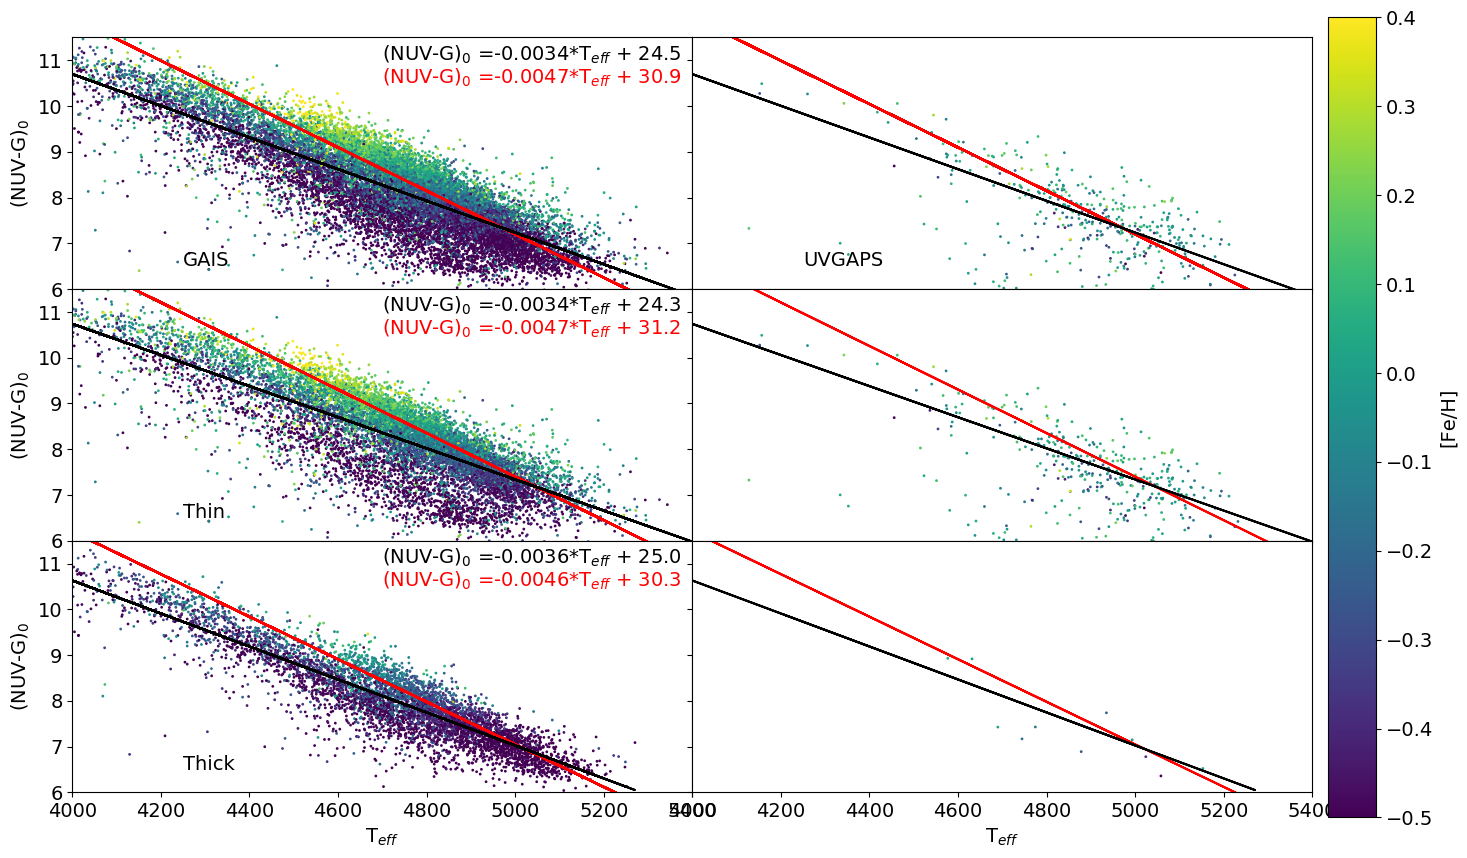

In [37]:
x1, y1 = 0.02, 0.065
x2, y2 = -0.86, 0.23
m = (y2 - y1) / (x2 - x1)
b = y1 - m*x1

thickp,= np.where((rcp['alphafe'] > 0.08) & (rcp['alphafe'] > (m*rcp['FE_H'] + b)))
thinp,= np.where((rcp['alphafe'] < 0.08) | (rcp['alphafe'] < (m*rcp['FE_H'] + b)))
thickg,= np.where((rcg['alphafe'] > 0.08) & (rcg['alphafe'] > (m*rcg['FE_H'] + b)))
thing,= np.where((rcg['alphafe'] < 0.08) | (rcg['alphafe'] < (m*rcg['FE_H'] + b)))
thinp = rcp[thinp]
thickp = rcp[thickp]
thing = rcg[thing]
thickg = rcg[thickg]
xline = np.linspace(3800, 5300, 50)



# Get fit lines for plot
xg = rcg['TEFF']
xp = rcp['TEFF']
xgthick = thickg['TEFF']
xpthick = thickp['TEFF']
xgthin = thing['TEFF']
xpthin = thinp['TEFF']


yg = (rcg['mag_nuv']-rcg['ebv3d']*7.24)-(rcg['phot_g_mean_mag']-rcg['ebv3d']*2.85)
yp = (rcp['nuv']-rcp['ebv']*7.24)-(rcp['phot_g_mean_mag']-rcp['ebv']*2.85)
ygthick = (thickg['mag_nuv']-thickg['ebv3d']*7.24)-(thickg['phot_g_mean_mag']-thickg['ebv3d']*2.85)
ypthick = (thickp['nuv']-thickp['ebv']*7.24)-(thickp['phot_g_mean_mag']-thickp['ebv']*2.85)
ygthin = (thing['mag_nuv']-thing['ebv3d']*7.24)-(thing['phot_g_mean_mag']-thing['ebv3d']*2.85)
ypthin = (thinp['nuv']-thinp['ebv']*7.24)-(thinp['phot_g_mean_mag']-thinp['ebv']*2.85)

zg, vg = np.polyfit(xg, yg, 1, cov=True)
zp, vp = np.polyfit(xp, yp, 1, cov=True)
pg = np.poly1d(zg)
pp = np.poly1d(zp)

zgthick, vgthick = np.polyfit(xgthick, ygthick, 1, cov=True)
zpthick, vpthick = np.polyfit(xpthick, ypthick, 1, cov=True)
pgthick = np.poly1d(zgthick)
ppthick = np.poly1d(zpthick)

zgthin, vgthin = np.polyfit(xgthin, ygthin, 1, cov=True)
zpthin, vpthin = np.polyfit(xpthin, ypthin, 1, cov=True)
pgthin = np.poly1d(zgthin)
ppthin = np.poly1d(zpthin)

gerr = np.sqrt(np.sum((pg(xg)-yg)**2)/len(xg))
perr = np.sqrt(np.sum((pp(xp)-yp)**2)/len(xp))

gthickerr = np.sqrt(np.sum((pgthick(xgthick)-ygthick)**2)/len(xgthick))
pthickerr = np.sqrt(np.sum((ppthick(xpthick)-ypthick)**2)/len(xpthick))

gthinerr = np.sqrt(np.sum((pgthin(xgthin)-ygthin)**2)/len(xgthin))
pthinerr = np.sqrt(np.sum((ppthin(xpthin)-ypthin)**2)/len(xpthin))


fig, axes = plt.subplots(3, 2, sharex=True, sharey=True, facecolor='w')
axes[0, 0].scatter(rcg['TEFF'], (rcg['mag_nuv']-rcg['ebv3d']*7.24)-(rcg['phot_g_mean_mag']-rcg['ebv3d']*2.85), c=rcg['FE_H'], vmin=-0.5, vmax=0.4, s=1)
cmap = axes[0, 1].scatter(rcp['TEFF'], (rcp['nuv']-rcp['ebv']*7.24)-(rcp['phot_g_mean_mag']-rcp['ebv']*2.85), c=rcp['FE_H'], vmin=-0.5, vmax=0.4, s=1)

axes[1, 0].scatter(thing['TEFF'], (thing['mag_nuv']-thing['ebv3d']*7.24)-(thing['phot_g_mean_mag']-thing['ebv3d']*2.85), c=thing['FE_H'], vmin=-0.5, vmax=0.4, s=1)
axes[1, 1].scatter(thinp['TEFF'], (thinp['nuv']-thinp['ebv']*7.24)-(thinp['phot_g_mean_mag']-thinp['ebv']*2.85), c=thinp['FE_H'], vmin=-0.5, vmax=0.4, s=1)

axes[2, 0].scatter(thickg['TEFF'], (thickg['mag_nuv']-thickg['ebv3d']*7.24)-(thickg['phot_g_mean_mag']-thickg['ebv3d']*2.85), c=thickg['FE_H'], vmin=-0.5, vmax=0.4, s=1)
axes[2, 1].scatter(thickp['TEFF'], (thickp['nuv']-thickp['ebv']*7.24)-(thickp['phot_g_mean_mag']-thickp['ebv']*2.85), c=thickp['FE_H'], vmin=-0.5, vmax=0.4, s=1)

    
axes[0, 0].plot(xg, -0.00474*xg + 30.9, c='red')
axes[0, 1].plot(xg, -0.00474*xg + 30.9, c='red')
axes[1, 0].plot(xg, -0.00476*xg + 31.2, c='red')
axes[1, 1].plot(xg, -0.00476*xg + 31.2, c='red')
axes[2, 0].plot(xg, -0.00465*xg + 30.3, c='red')
axes[2, 1].plot(xg, -0.00465*xg + 30.3, c='red')

axes[0, 0].plot(xg, zg[0]*rcg['TEFF'] + zg[1], c='black')
axes[0, 1].plot(xg, zg[0]*rcg['TEFF'] + zg[1], c='black')
axes[1, 0].plot(xgthin, zgthin[0]*xgthin + zgthin[1], c='black')
axes[1, 1].plot(xgthin, zgthin[0]*xgthin + zgthin[1], c='black')
axes[2, 0].plot(xgthick, zgthick[0]*xgthick + zgthick[1], c='black')
axes[2, 1].plot(xgthick, zgthick[0]*xgthick + zgthick[1], c='black')

cbar_ax = fig.add_axes([0.91, 0.1, 0.03, 0.8])
plt.colorbar(cmap, cax=cbar_ax).set_label('[Fe/H]')
axes[2, 0].set_xlabel('T$_{eff}$')
axes[2, 1].set_xlabel('T$_{eff}$')
axes[0, 0].set_ylabel('(NUV-G)$_0$')
axes[1, 0].set_ylabel('(NUV-G)$_0$')
axes[2, 0].set_ylabel('(NUV-G)$_0$')
axes[0, 0].set_xlim(4000, 5400)
axes[0, 1].set_xlim(4000, 5400)
axes[1, 0].set_xlim(4000, 5400)
axes[1, 1].set_xlim(4000, 5400)
axes[1, 0].set_ylim(6, 11.5)
axes[1, 1].set_ylim(6, 11.5)
fig.subplots_adjust(wspace=0, hspace=0)
axes[0, 0].annotate('GAIS', xy=(4250, 6.5))
axes[0, 1].annotate('UVGAPS', xy=(4250, 6.5))
axes[1, 0].annotate('Thin', xy=(4250, 6.5))
axes[2, 0].annotate('Thick', xy=(4250, 6.5))

axes[0, 0].annotate('(NUV-G)$_0$ ='+str(zg[0])[:7]+'*T$_{eff}$ + '+str(zg[1])[:4], xy=(4700, 11))
axes[0, 0].annotate('(NUV-G)$_0$ =-0.0047*T$_{eff}$ + 30.9', xy=(4700, 10.5), color='red')
axes[1, 0].annotate('(NUV-G)$_0$ ='+str(zgthin[0])[:7]+'*T$_{eff}$ + '+str(zgthin[1])[:4], xy=(4700, 11))
axes[1, 0].annotate('(NUV-G)$_0$ =-0.0047*T$_{eff}$ + 31.2', xy=(4700, 10.5), color='red')
axes[2, 0].annotate('(NUV-G)$_0$ ='+str(zgthick[0])[:7]+'*T$_{eff}$ + '+str(zgthick[1])[:4], xy=(4700, 11))
axes[2, 0].annotate('(NUV-G)$_0$ =-0.0046*T$_{eff}$ + 30.3', xy=(4700, 10.5), color='red')

#axes[0, 1].annotate('(NUV-G)$_0$ ='+str(zp[0])[:7]+'*T$_{eff}$ '+str(zp[1])[:4], xy=(4700, 11))
#axes[1, 1].annotate('(NUV-G)$_0$ ='+str(zpthin[0])[:7]+'*T$_{eff}$ '+str(zpthin[1])[:4], xy=(4700, 11))
#axes[2, 1].annotate('(NUV-G)$_0$ ='+str(zpthick[0])[:7]+'*T$_{eff}$ '+str(zpthick[1])[:4], xy=(4700, 11))
plt.show()


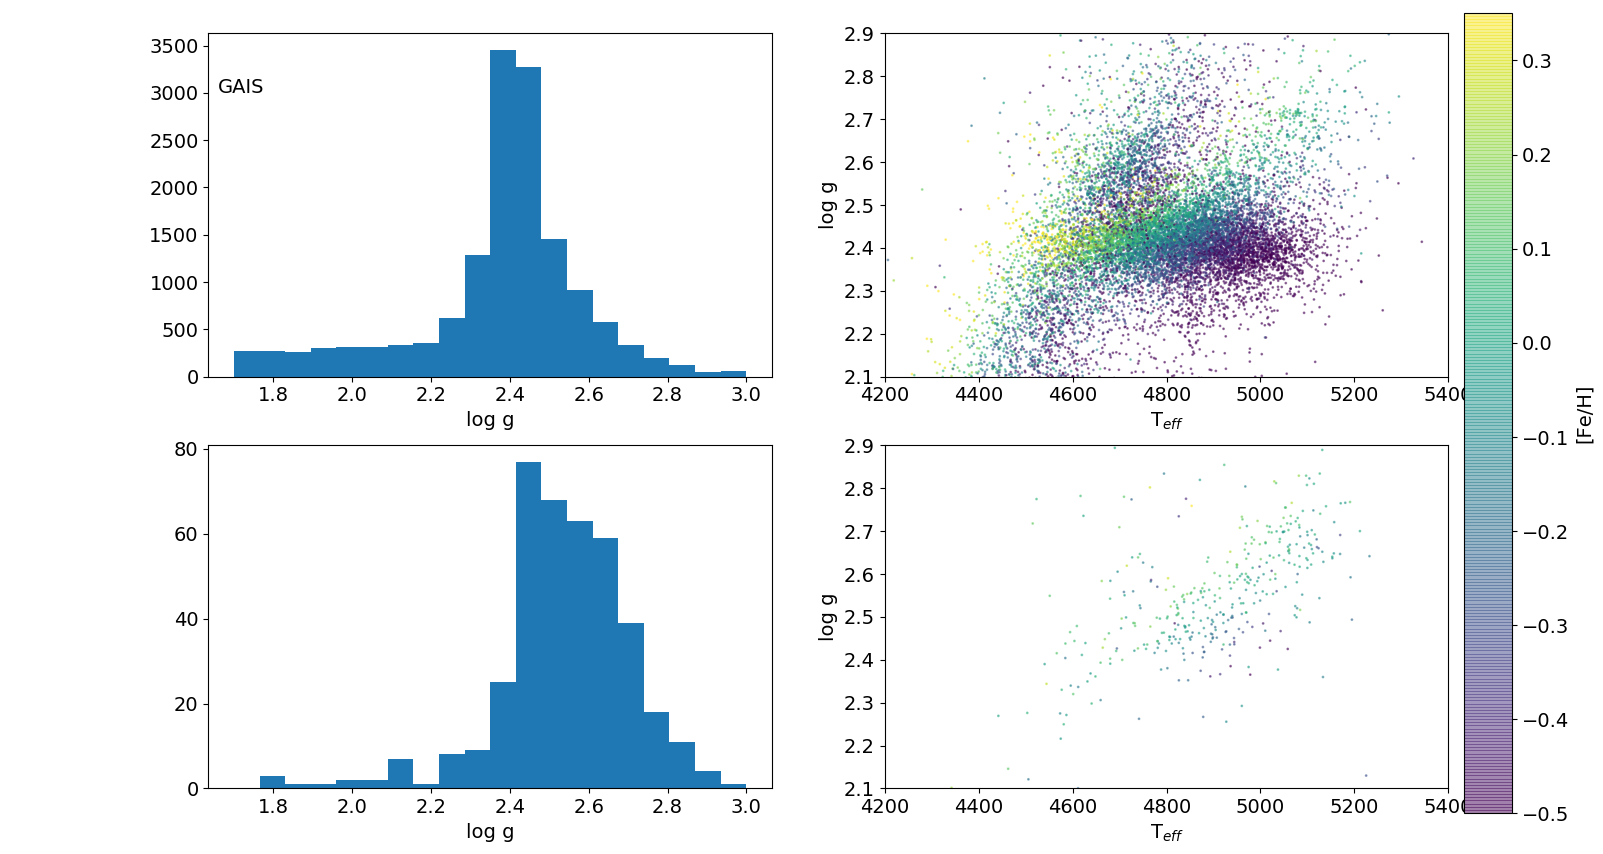

In [36]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].hist(rcg['LOGG'], bins=20, range=[1.7, 3])
axes[1, 0].hist(rcp['LOGG'], bins=20, range=[1.7, 3])
cmap = axes[0, 1].scatter(rcg['TEFF'], rcg['LOGG'], c=rcg['FE_H'], vmin=-0.5, vmax=0.35, s=1, alpha=0.5)
axes[1, 1].scatter(rcp['TEFF'], rcp['LOGG'], c=rcp['FE_H'], vmin=-0.5, vmax=0.35, s=1, alpha=0.5)
axes[0, 1].set_xlim(4200, 5400)
axes[1, 1].set_xlim(4200, 5400)
axes[0, 1].set_ylim(2.1, 2.9)
axes[1, 1].set_ylim(2.1, 2.9)
axes[0, 0].set_xlabel('log g')
axes[1, 0].set_xlabel('log g')
axes[0, 1].set_ylabel('log g')
axes[1, 1].set_ylabel('log g')
axes[0, 1].set_xlabel('T$_{eff}$')
axes[1, 1].set_xlabel('T$_{eff}$')
axes[0, 0].annotate('GAIS', xy=(1.66, 3000))
axes[1, 0].annotate('UVGAPS', xy=(1.66, 109))
cbar_ax = fig.add_axes([0.91, 0.1, 0.03, 0.8])
plt.colorbar(cmap, cax=cbar_ax).set_label('[Fe/H]')
plt.show()

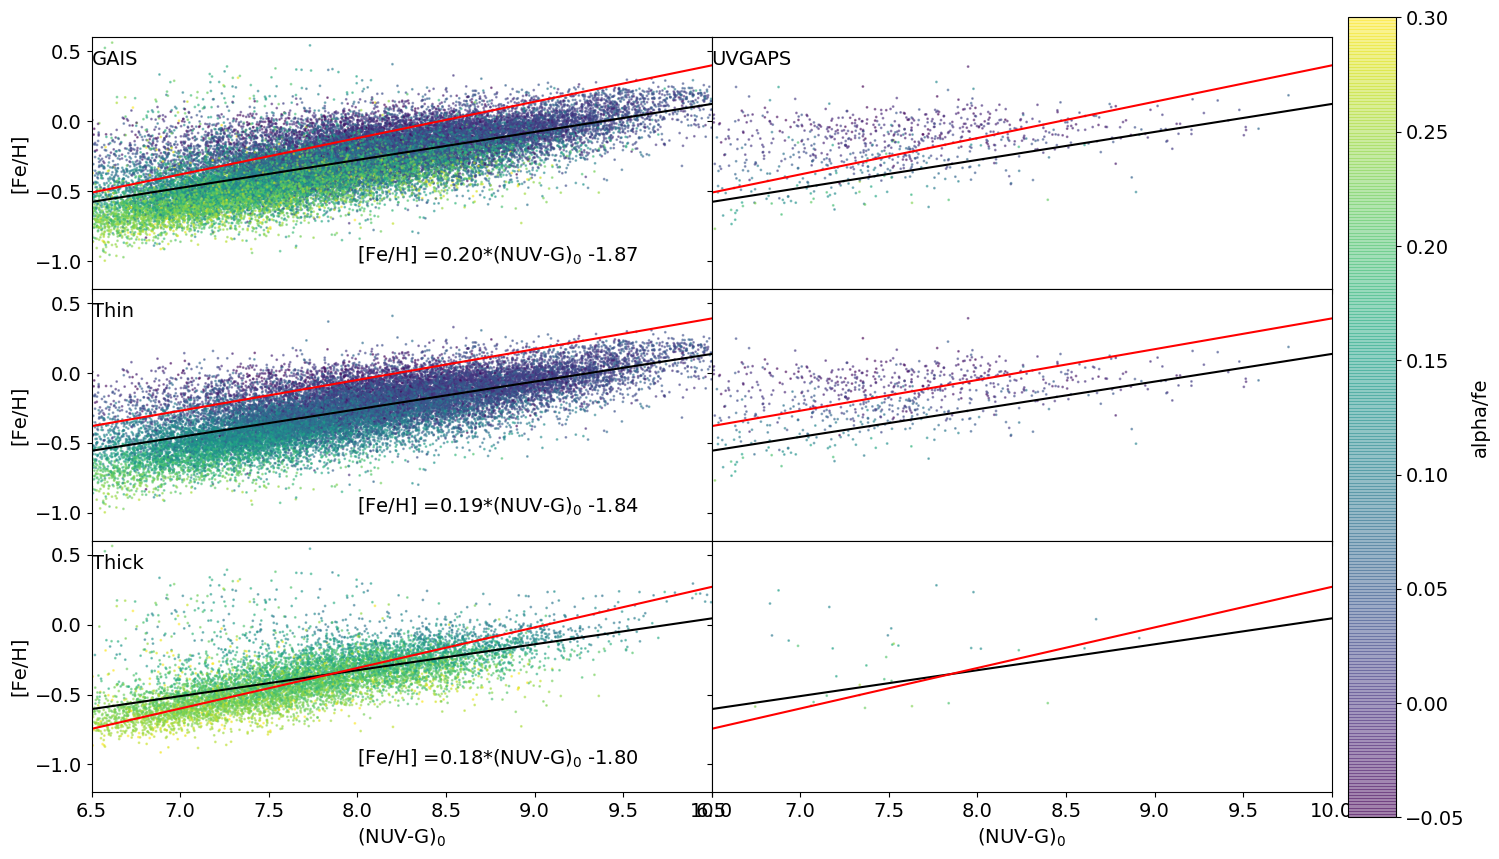

In [21]:
x1, y1 = 8.18, -0.28
x2, y2 = 10, 0.57
m = (y2-y1)/(x2-x1)
b = y2 - x2*m
mg = lg['phot_g_mean_mag']-lg['distmod']
nuvgrc = lg['mag_nuv']-lg['phot_g_mean_mag']
#q = np.where((mg > -0.3) & (nuvgrc > 7) & (nuvgrc < 10) & (m*nuvgrc + b < mg))
#rcg = rcg[q]


xline = np.linspace(6.5, 10, 50)
m = (0.265-0.065)/(-0.88-0.02)
b = 0.0694

thickp,= np.where((lp['AFE'] > 0.08) & (lp['AFE'] > (m*lp['FEH'] + b)))
thinp,= np.where((lp['AFE'] < 0.08) | (lp['AFE'] < (m*lp['FEH'] + b)))
thickg,= np.where((lg['AFE'] > 0.08) & (lg['AFE'] > (m*lg['FEH'] + b)))
thing,= np.where((lg['AFE'] < 0.08) | (lg['AFE'] < (m*lg['FEH'] + b)))
thinp = lp[thinp]
thickp = lp[thickp]
thing = lg[thing]
thickg = lg[thickg]


# Get fit lines for plot
xg = (lg['mag_nuv']-lg['ebv']*7.24)-(lg['phot_g_mean_mag']-lg['ebv']*2.85)
xp = (lp['nuv']-lp['ebv3d']*7.24)-(lp['phot_g_mean_mag']-lp['ebv3d']*2.85)

xgthick = (thickg['mag_nuv']-thickg['ebv']*7.24)-(thickg['phot_g_mean_mag']-thickg['ebv']*2.85)
xpthick = (thickp['nuv']-thickp['ebv3d']*7.24)-(thickp['phot_g_mean_mag']-thickp['ebv3d']*2.85)
xgthin = (thing['mag_nuv']-thing['ebv']*7.24)-(thing['phot_g_mean_mag']-thing['ebv']*2.85)
xpthin = (thinp['nuv']-thinp['ebv3d']*7.24)-(thinp['phot_g_mean_mag']-thinp['ebv3d']*2.85)

yg = lg['FEH']
yp = lp['FEH']
ygthick = thickg['FEH']
ypthick = thickp['FEH']
ygthin = thing['FEH']
ypthin = thinp['FEH']

zg, vg = np.polyfit(xg, yg, 1, cov=True)
zp, vp = np.polyfit(xp, yp, 1, cov=True)
pg = np.poly1d(zg)
pp = np.poly1d(zp)

zgthick, vgthick = np.polyfit(xgthick, ygthick, 1, cov=True)
zpthick, vpthick = np.polyfit(xpthick, ypthick, 1, cov=True)
pgthick = np.poly1d(zgthick)
ppthick = np.poly1d(zpthick)

zgthin, vgthin = np.polyfit(xgthin, ygthin, 1, cov=True)
zpthin, vpthin = np.polyfit(xpthin, ypthin, 1, cov=True)
pgthin = np.poly1d(zgthin)
ppthin = np.poly1d(zpthin)

gerr = np.sqrt(np.sum((pg(xg)-yg)**2)/len(xg))
perr = np.sqrt(np.sum((pp(xp)-yp)**2)/len(xp))

gthickerr = np.sqrt(np.sum((pgthick(xgthick)-ygthick)**2)/len(xgthick))
pthickerr = np.sqrt(np.sum((ppthick(xpthick)-ypthick)**2)/len(xpthick))

gthinerr = np.sqrt(np.sum((pgthin(xgthin)-ygthin)**2)/len(xgthin))
pthinerr = np.sqrt(np.sum((ppthin(xpthin)-ypthin)**2)/len(xpthin))



fig, axes = plt.subplots(3, 2, sharex=True, sharey=True, facecolor='w')
cmap = axes[0, 0].scatter((lg['mag_nuv']-lg['ebv']*7.24)-(lg['phot_g_mean_mag']-lg['ebv']*2.85), lg['FEH'], c=lg['AFE'], vmin=-0.05, vmax=0.3, s=1, alpha=0.5)
axes[0, 1].scatter((lp['nuv']-lp['ebv3d']*7.24)-(lp['phot_g_mean_mag']-lp['ebv3d']*2.85), lp['FEH'], c=lp['AFE'], vmin=-0.05, vmax=0.3, s=1, alpha=0.5)
axes[0, 0].plot(xline, pg(xline), c='black')
axes[0, 1].plot(xline, pg(xline), c='black')
axes[0, 0].plot(xline, 0.26*xline - 2.20, c='red')
axes[0, 1].plot(xline, 0.26*xline - 2.20, c='red')
#axes[0, 1].plot(xline, pp(xline), c='red')

axes[1, 0].scatter((thing['mag_nuv']-thing['ebv']*7.24)-(thing['phot_g_mean_mag']-thing['ebv']*2.85), thing['FEH'], c=thing['AFE'], vmin=-0.05, vmax=0.3, s=1, alpha=0.5)
axes[1, 1].scatter((thinp['nuv']-thinp['ebv3d']*7.24)-(thinp['phot_g_mean_mag']-thinp['ebv3d']*2.85), thinp['FEH'], c=thinp['AFE'], vmin=-0.05, vmax=0.3, s=1, alpha=0.5)
axes[1, 0].plot(xline, pgthin(xline), c='black')
axes[1, 1].plot(xline, pgthin(xline), c='black')

axes[1, 0].plot(xline, 0.22*xline - 1.81, c='red')
axes[1, 1].plot(xline, 0.22*xline - 1.81, c='red')

#axes[1, 1].plot(xline, pgthin(xline), c='red')


axes[2, 0].scatter((thickg['mag_nuv']-thickg['ebv']*7.24)-(thickg['phot_g_mean_mag']-thickg['ebv']*2.85), thickg['FEH'], c=thickg['AFE'], vmin=-0.05, vmax=0.3, s=1, alpha=0.5)
axes[2, 1].scatter((thickp['nuv']-thickp['ebv3d']*7.24)-(thickp['phot_g_mean_mag']-thickp['ebv3d']*2.85), thickp['FEH'], c=thickp['AFE'], vmin=-0.05, vmax=0.3, s=1, alpha=0.5)
axes[2, 0].plot(xline, pgthick(xline), c='black')
axes[2, 1].plot(xline, pgthick(xline), c='black')

axes[2, 0].plot(xline, 0.29*xline - 2.63, c='red')
axes[2, 1].plot(xline, 0.29*xline - 2.63, c='red')

#axes[2, 1].plot(xline, pgthick(xline), c='red')

cbar_ax = fig.add_axes([0.91, 0.1, 0.03, 0.8])
plt.colorbar(cmap, cax=cbar_ax).set_label('alpha/fe')
axes[0, 0].set_ylabel('[Fe/H]')
axes[1, 0].set_ylabel('[Fe/H]')
axes[2, 0].set_ylabel('[Fe/H]')
axes[2, 0].set_xlabel('(NUV-G)$_0$')
axes[2, 1].set_xlabel('(NUV-G)$_0$')
axes[0, 0].set_xlim(6.5, 10)
axes[0, 1].set_xlim(6.5, 10)
axes[1, 0].set_xlim(6.5, 10)
axes[1, 1].set_xlim(6.5, 10)
axes[2, 0].set_xlim(6.5, 10)
axes[2, 1].set_xlim(6.5, 10)
axes[0, 0].set_ylim(-1.2, 0.6)
axes[0, 1].set_ylim(-1.2, 0.6)
axes[1, 0].set_ylim(-1.2, 0.6)
axes[1, 1].set_ylim(-1.2, 0.6)
axes[2, 0].set_ylim(-1.2, 0.6)
axes[2, 1].set_ylim(-1.2, 0.6)

fig.subplots_adjust(wspace=0, hspace=0)
axes[0, 0].annotate('GAIS', xy=(6.5, 0.4))
axes[0, 1].annotate('UVGAPS', xy=(6.5, 0.4))
axes[1, 0].annotate('Thin', xy=(6.5, 0.4))
axes[2, 0].annotate('Thick', xy=(6.5, 0.4))

axes[0, 0].annotate('[Fe/H] ='+str(zg[0])[:4]+'*(NUV-G)$_0$ '+str(zg[1])[:5], xy=(8, -1))
#axes[0, 1].annotate('[Fe/H] ='+str(zp[0])[:4]+'*(NUV-G)$_0$ '+str(zp[1])[:5], xy=(8, -1))
axes[1, 0].annotate('[Fe/H] ='+str(zgthin[0])[:4]+'*(NUV-G)$_0$ '+str(zgthin[1])[:5], xy=(8, -1))
#axes[1, 1].annotate('[Fe/H] ='+str(zpthin[0])[:4]+'*(NUV-G)$_0$ '+str(zpthin[1])[:5], xy=(8, -1))
axes[2, 0].annotate('[Fe/H] ='+str(zgthick[0])[:4]+'*(NUV-G)$_0$ '+str(zgthick[1])[:5], xy=(8, -1))
#axes[2, 1].annotate('[Fe/H] ='+str(zpthick[0])[:4]+'*(NUV-G)$_0$ '+str(zpthick[1])[:5], xy=(8, -1))
plt.show()



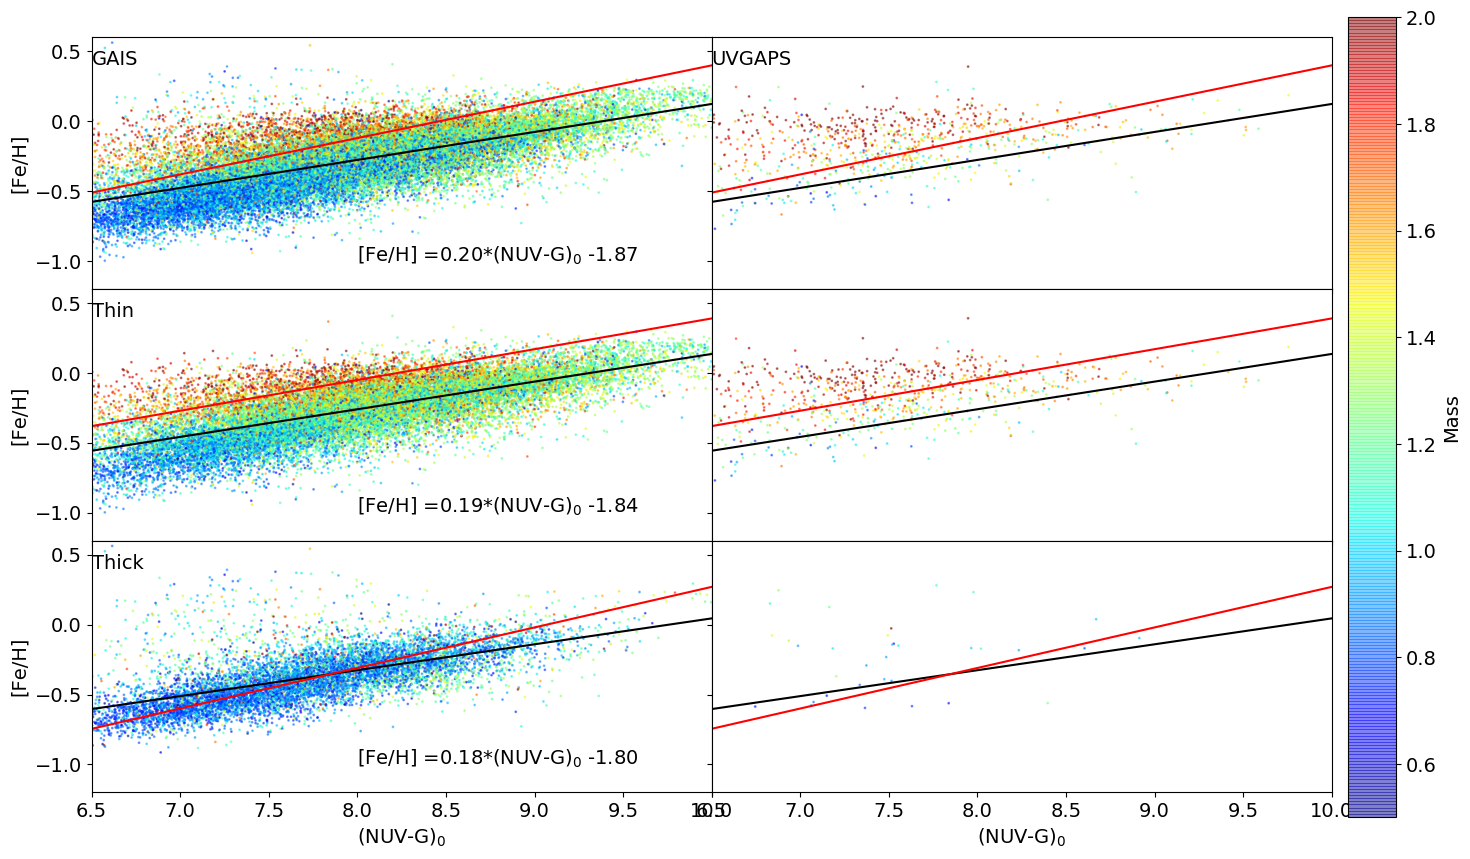

In [27]:
fig, axes = plt.subplots(3, 2, sharex=True, sharey=True, facecolor='w')
cmap = axes[0, 0].scatter((lg['mag_nuv']-lg['ebv']*7.24)-(lg['phot_g_mean_mag']-lg['ebv']*2.85), lg['FEH'], c=lg['MASS'], vmin=0.5, vmax=2, s=1, alpha=0.5, cmap=cm.jet)
axes[0, 1].scatter((lp['nuv']-lp['ebv3d']*7.24)-(lp['phot_g_mean_mag']-lp['ebv3d']*2.85), lp['FEH'], c=lp['MASS'], vmin=0.5, vmax=2, s=1, alpha=0.5, cmap=cm.jet)
axes[0, 0].plot(xline, pg(xline), c='black')
axes[0, 1].plot(xline, pg(xline), c='black')
axes[0, 0].plot(xline, 0.26*xline - 2.20, c='red')
axes[0, 1].plot(xline, 0.26*xline - 2.20, c='red')

axes[1, 0].scatter((thing['mag_nuv']-thing['ebv']*7.24)-(thing['phot_g_mean_mag']-thing['ebv']*2.85), thing['FEH'], c=thing['MASS'], vmin=0.5, vmax=2, s=1, alpha=0.5, cmap=cm.jet)
axes[1, 1].scatter((thinp['nuv']-thinp['ebv3d']*7.24)-(thinp['phot_g_mean_mag']-thinp['ebv3d']*2.85), thinp['FEH'], c=thinp['MASS'], vmin=0.5, vmax=2, s=1, alpha=0.5, cmap=cm.jet)
axes[1, 0].plot(xline, pgthin(xline), c='black')
axes[1, 1].plot(xline, pgthin(xline), c='black')

axes[1, 0].plot(xline, 0.22*xline - 1.81, c='red')
axes[1, 1].plot(xline, 0.22*xline - 1.81, c='red')


axes[2, 0].scatter((thickg['mag_nuv']-thickg['ebv']*7.24)-(thickg['phot_g_mean_mag']-thickg['ebv']*2.85), thickg['FEH'], c=thickg['MASS'], vmin=0.5, vmax=2, s=1, alpha=0.5, cmap=cm.jet)
axes[2, 1].scatter((thickp['nuv']-thickp['ebv3d']*7.24)-(thickp['phot_g_mean_mag']-thickp['ebv3d']*2.85), thickp['FEH'], c=thickp['MASS'], vmin=0.5, vmax=2, s=1, alpha=0.5, cmap=cm.jet)
axes[2, 0].plot(xline, pgthick(xline), c='black')
axes[2, 1].plot(xline, pgthick(xline), c='black')

axes[2, 0].plot(xline, 0.29*xline - 2.63, c='red')
axes[2, 1].plot(xline, 0.29*xline - 2.63, c='red')

#axes[2, 1].plot(xline, pgthick(xline), c='red')

cbar_ax = fig.add_axes([0.91, 0.1, 0.03, 0.8])
plt.colorbar(cmap, cax=cbar_ax).set_label('Mass')
axes[0, 0].set_ylabel('[Fe/H]')
axes[1, 0].set_ylabel('[Fe/H]')
axes[2, 0].set_ylabel('[Fe/H]')
axes[2, 0].set_xlabel('(NUV-G)$_0$')
axes[2, 1].set_xlabel('(NUV-G)$_0$')
axes[0, 0].set_xlim(6.5, 10)
axes[0, 1].set_xlim(6.5, 10)
axes[1, 0].set_xlim(6.5, 10)
axes[1, 1].set_xlim(6.5, 10)
axes[2, 0].set_xlim(6.5, 10)
axes[2, 1].set_xlim(6.5, 10)
axes[0, 0].set_ylim(-1.2, 0.6)
axes[0, 1].set_ylim(-1.2, 0.6)
axes[1, 0].set_ylim(-1.2, 0.6)
axes[1, 1].set_ylim(-1.2, 0.6)
axes[2, 0].set_ylim(-1.2, 0.6)
axes[2, 1].set_ylim(-1.2, 0.6)

fig.subplots_adjust(wspace=0, hspace=0)
axes[0, 0].annotate('GAIS', xy=(6.5, 0.4))
axes[0, 1].annotate('UVGAPS', xy=(6.5, 0.4))
axes[1, 0].annotate('Thin', xy=(6.5, 0.4))
axes[2, 0].annotate('Thick', xy=(6.5, 0.4))

axes[0, 0].annotate('[Fe/H] ='+str(zg[0])[:4]+'*(NUV-G)$_0$ '+str(zg[1])[:5], xy=(8, -1))
#axes[0, 1].annotate('[Fe/H] ='+str(zp[0])[:4]+'*(NUV-G)$_0$ '+str(zp[1])[:5], xy=(8, -1))
axes[1, 0].annotate('[Fe/H] ='+str(zgthin[0])[:4]+'*(NUV-G)$_0$ '+str(zgthin[1])[:5], xy=(8, -1))
#axes[1, 1].annotate('[Fe/H] ='+str(zpthin[0])[:4]+'*(NUV-G)$_0$ '+str(zpthin[1])[:5], xy=(8, -1))
axes[2, 0].annotate('[Fe/H] ='+str(zgthick[0])[:4]+'*(NUV-G)$_0$ '+str(zgthick[1])[:5], xy=(8, -1))
#axes[2, 1].annotate('[Fe/H] ='+str(zpthick[0])[:4]+'*(NUV-G)$_0$ '+str(zpthick[1])[:5], xy=(8, -1))
plt.show()


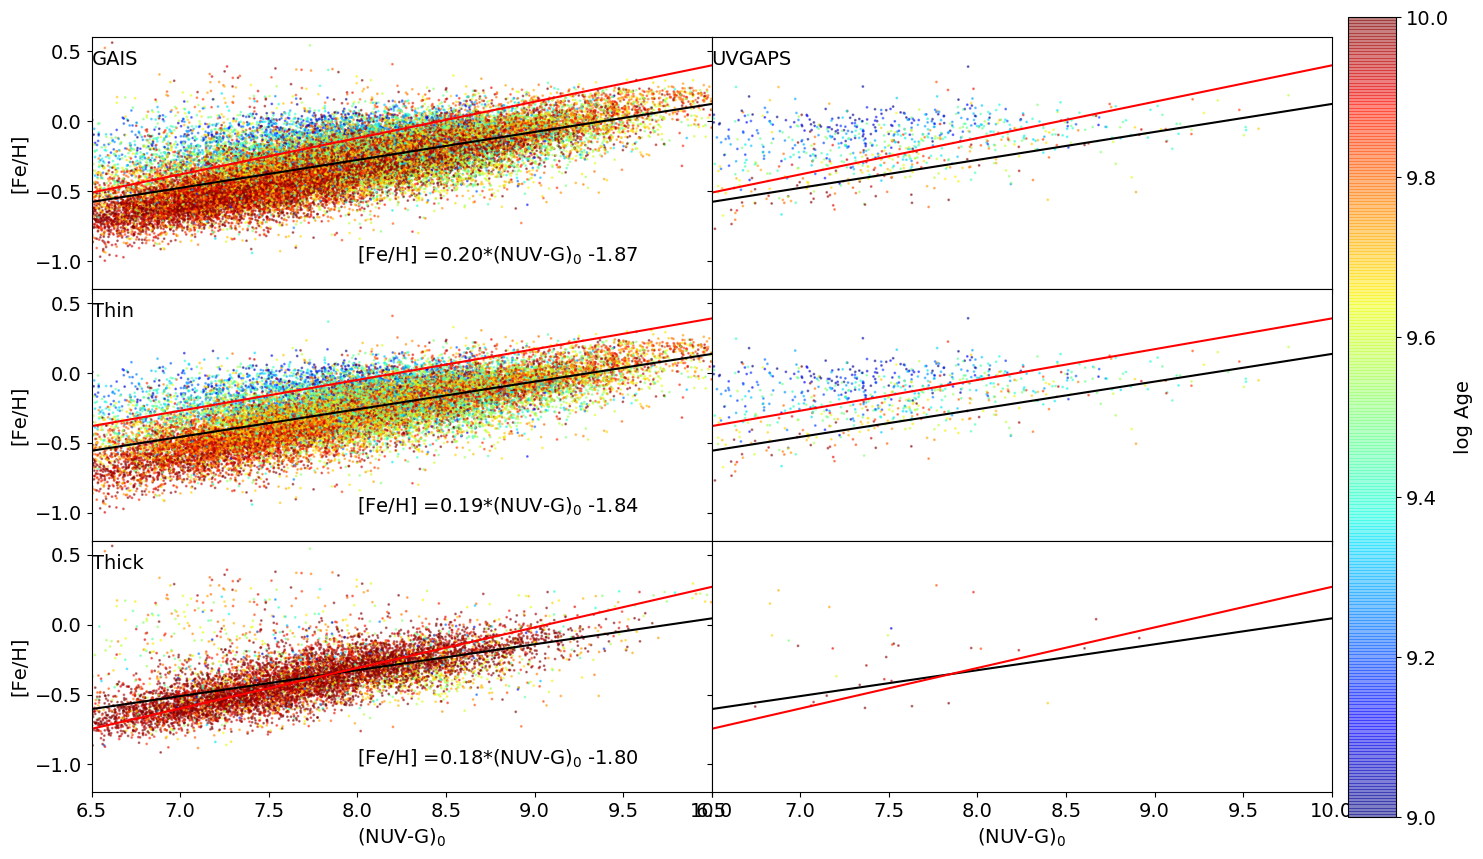

In [33]:
fig, axes = plt.subplots(3, 2, sharex=True, sharey=True, facecolor='w')
cmap = axes[0, 0].scatter((lg['mag_nuv']-lg['ebv']*7.24)-(lg['phot_g_mean_mag']-lg['ebv']*2.85), lg['FEH'], c=np.log10(lg['AGE']*10**9), vmin=9, vmax=10, s=1, alpha=0.5, cmap=cm.jet)
axes[0, 1].scatter((lp['nuv']-lp['ebv3d']*7.24)-(lp['phot_g_mean_mag']-lp['ebv3d']*2.85), lp['FEH'], c=np.log10(lp['AGE']*10**9), vmin=9, vmax=10, s=1, alpha=0.5, cmap=cm.jet)
axes[0, 0].plot(xline, pg(xline), c='black')
axes[0, 1].plot(xline, pg(xline), c='black')
axes[0, 0].plot(xline, 0.26*xline - 2.20, c='red')
axes[0, 1].plot(xline, 0.26*xline - 2.20, c='red')

axes[1, 0].scatter((thing['mag_nuv']-thing['ebv']*7.24)-(thing['phot_g_mean_mag']-thing['ebv']*2.85), thing['FEH'], c=np.log10(thing['AGE']*10**9), vmin=9, vmax=10, s=1, alpha=0.5, cmap=cm.jet)
axes[1, 1].scatter((thinp['nuv']-thinp['ebv3d']*7.24)-(thinp['phot_g_mean_mag']-thinp['ebv3d']*2.85), thinp['FEH'], c=np.log10(thinp['AGE']*10**9), vmin=9, vmax=10, s=1, alpha=0.5, cmap=cm.jet)
axes[1, 0].plot(xline, pgthin(xline), c='black')
axes[1, 1].plot(xline, pgthin(xline), c='black')

axes[1, 0].plot(xline, 0.22*xline - 1.81, c='red')
axes[1, 1].plot(xline, 0.22*xline - 1.81, c='red')


axes[2, 0].scatter((thickg['mag_nuv']-thickg['ebv']*7.24)-(thickg['phot_g_mean_mag']-thickg['ebv']*2.85), thickg['FEH'], c=np.log10(thickg['AGE']*10**9), vmin=9, vmax=10, s=1, alpha=0.5, cmap=cm.jet)
axes[2, 1].scatter((thickp['nuv']-thickp['ebv3d']*7.24)-(thickp['phot_g_mean_mag']-thickp['ebv3d']*2.85), thickp['FEH'], c=np.log10(thickp['AGE']*10**9), vmin=9, vmax=10, s=1, alpha=0.5, cmap=cm.jet)
axes[2, 0].plot(xline, pgthick(xline), c='black')
axes[2, 1].plot(xline, pgthick(xline), c='black')

axes[2, 0].plot(xline, 0.29*xline - 2.63, c='red')
axes[2, 1].plot(xline, 0.29*xline - 2.63, c='red')

cbar_ax = fig.add_axes([0.91, 0.1, 0.03, 0.8])
plt.colorbar(cmap, cax=cbar_ax).set_label('log Age')
axes[0, 0].set_ylabel('[Fe/H]')
axes[1, 0].set_ylabel('[Fe/H]')
axes[2, 0].set_ylabel('[Fe/H]')
axes[2, 0].set_xlabel('(NUV-G)$_0$')
axes[2, 1].set_xlabel('(NUV-G)$_0$')
axes[0, 0].set_xlim(6.5, 10)
axes[0, 1].set_xlim(6.5, 10)
axes[1, 0].set_xlim(6.5, 10)
axes[1, 1].set_xlim(6.5, 10)
axes[2, 0].set_xlim(6.5, 10)
axes[2, 1].set_xlim(6.5, 10)
axes[0, 0].set_ylim(-1.2, 0.6)
axes[0, 1].set_ylim(-1.2, 0.6)
axes[1, 0].set_ylim(-1.2, 0.6)
axes[1, 1].set_ylim(-1.2, 0.6)
axes[2, 0].set_ylim(-1.2, 0.6)
axes[2, 1].set_ylim(-1.2, 0.6)

fig.subplots_adjust(wspace=0, hspace=0)
axes[0, 0].annotate('GAIS', xy=(6.5, 0.4))
axes[0, 1].annotate('UVGAPS', xy=(6.5, 0.4))
axes[1, 0].annotate('Thin', xy=(6.5, 0.4))
axes[2, 0].annotate('Thick', xy=(6.5, 0.4))

axes[0, 0].annotate('[Fe/H] ='+str(zg[0])[:4]+'*(NUV-G)$_0$ '+str(zg[1])[:5], xy=(8, -1))
axes[1, 0].annotate('[Fe/H] ='+str(zgthin[0])[:4]+'*(NUV-G)$_0$ '+str(zgthin[1])[:5], xy=(8, -1))
axes[2, 0].annotate('[Fe/H] ='+str(zgthick[0])[:4]+'*(NUV-G)$_0$ '+str(zgthick[1])[:5], xy=(8, -1))

#axes[0, 1].annotate('[Fe/H] ='+str(zp[0])[:4]+'*(NUV-G)$_0$ '+str(zp[1])[:5], xy=(8, -1))
#axes[1, 1].annotate('[Fe/H] ='+str(zpthin[0])[:4]+'*(NUV-G)$_0$ '+str(zpthin[1])[:5], xy=(8, -1))
#axes[2, 1].annotate('[Fe/H] ='+str(zpthick[0])[:4]+'*(NUV-G)$_0$ '+str(zpthick[1])[:5], xy=(8, -1))
plt.show()
